# Visualization

## 1.1. Introduction

DS Techniques

1. Descriptive Analytics
2. Preductive Analytics
3. Prescriptive Analystics

Why Visualization?

* catch information efficiently
* summary statistics 같아도 distribution은 각자 다를 수 있음

Data-Ink ratio 

* 배경 색 없애기?
* 색을 까맣게 할까 하얗게 할까?
* ...

절대적 기준 아님. 정보를 무조건 날릴 건 아님...

Chartjunk

3D : 정보 표현에 별로 효과적이지 않음. flat한 게 차라리 나음...

NYT : Visualization 적절히 활용.

시각화 관련 사이트

...

장식? 별로 필요 없음

interactive visulaization : 도움 됨

### Bar charts

categorical 변수의 정량적 표현

### Line charts

Bar chart를 옮긴 것.

변수 간 '관계'를 암시 -> 관계가 없는데 쓰면 misleading!

시계열 그래프와 친숙.

eg. 주식...

### Pie Charts/도넛

쓰지 마세요... 크기 비교하기 어려움.

카테고리 여러 개 되면 특히 더 그렇습니다.

쓰는 이유? '해당 카테고리 대표'를 시각화하기 그나마 편리.

### Scatterplot

두 숫자형 변수 사이의 관계 표현

### Hitmap

Scatterplot에서 구간별로 점의 수 센 것.

### Treemap

포함 관계 자료구조 시각화

eg. 코스피 전체 사각형 -> 삼성전자, SK하이닉스, ... -> 올리면 빨강 내리면 파랑

### Geographic 

### Network Graph

점들 사이의 이어진 관계 표현.

## The Grammar of Graphics

visualization : 문법을 따라 데이터를 변환시켜 나온 결과물

* Data
* Aesthetics : 어떤 변수를 어디 mapping?
* Geometries : data + aes를 결합할 때 어떤 도형 사용? point, line, bar, ...
* Scales
* Coordinate system
* Facets
* Statistics

현재 시각화 패키지 : 대부분 해당 개념에 기반

# Data Wrangling

In [2]:
import pandas as pd
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## "Tidy Data"

conceptualized by H.Wicom

의미 : 

why? 변수가 시각적으로 mapping되기 유용함.

In [3]:
#pivot() and melt() to make a dataset tidy.
#pivot() long form to wide form
#melt() wide form to long form

In [4]:
var_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
id_list = [i for i in df.columns if i not in var_list] + ['UniqueKey']
df1 = df.assign(UniqueKey=df.index+1).melt(id_vars = id_list, value_vars = var_list, var_name = "Region", value_name = "Sales")
df1.sort_values(['Name', 'Region'], ignore_index = True)[['Name', 'Region', 'Sales']]
df2 = df1.pivot(index = id_list, columns='Region', values='Sales').reset_index()

In [5]:
df1

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,UniqueKey,Region,Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,76.0,51.0,8,322.0,Nintendo,E,1,NA_Sales,41.36
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,2,NA_Sales,29.08
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,82.0,73.0,8.3,709.0,Nintendo,E,3,NA_Sales,15.68
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,80.0,73.0,8,192.0,Nintendo,E,4,NA_Sales,15.61
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,5,NA_Sales,11.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83590,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,NaN,NaN,NaN,NaN,NaN,NaN,16715,Global_Sales,0.01
83591,LMA Manager 2007,X360,2006.0,Sports,Codemasters,NaN,NaN,NaN,NaN,NaN,NaN,16716,Global_Sales,0.01
83592,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,NaN,NaN,NaN,NaN,NaN,NaN,16717,Global_Sales,0.01
83593,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,NaN,NaN,NaN,NaN,NaN,NaN,16718,Global_Sales,0.01


In [6]:
df2

Region,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,UniqueKey,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
0,NaN,GEN,1993.0,NaN,Acclaim Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,660,0.53,2.39,0.00,1.78,0.08
1,NaN,GEN,1993.0,NaN,Acclaim Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,14247,0.00,0.03,0.03,0.00,0.00
2,Beyblade Burst,3DS,2016.0,Role-Playing,FuRyu,NaN,NaN,NaN,NaN,NaN,NaN,14986,0.00,0.03,0.03,0.00,0.00
3,Fire Emblem Fates,3DS,2015.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,1080,0.23,1.68,0.52,0.81,0.11
4,Frozen: Olaf's Quest,3DS,2013.0,Platform,Disney Interactive Studios,NaN,NaN,NaN,NaN,NaN,NaN,3359,0.27,0.60,0.00,0.27,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,uDraw Studio,Wii,2010.0,Misc,THQ,71.0,9.0,tbd,NaN,THQ,E,646,0.57,2.42,0.00,1.65,0.20
16715,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,NaN,NaN,tbd,NaN,THQ,E,8282,0.09,0.17,0.00,0.06,0.02
16716,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,54.0,5.0,5.7,6.0,THQ,E,15615,0.01,0.02,0.00,0.01,0.00
16717,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476,1.02,3.00,0.00,1.57,0.41


In [7]:
# Check what's wrong
df.astype({'Year_of_Release' : 'int64'})
IntCastingNaNError
df.astype({'User_Score' : 'float64'})
ValueError
# 1. fix it after read_csv
df.replace(['N/A', 'tbd'], np.NaN, inplace=True)
df = df.astype({
'Year_of_Release': 'Int64', #you should note that I in the Int64 is capital in this time
'User_Score' : 'float64'
})
df.dtypes
# 2. fix it when reading the file
df = pd.read_csv("data/Video_Games_Sales_as_at_22_Dec_2016.csv", na_values=["N/A", "tbd"])

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer: Error while type casting for column 'Year_of_Release'

## loc : like select() in R



In [8]:
df.loc[:, ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales']] 
df[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales']] #same result

,Name,Platform,Year_of_Release,Genre,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,82.53
1,Super Mario Bros.,NES,1985.0,Platform,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,31.37
...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,0.01


## Assign : like mutate() in R

In [33]:
df.assign(Total_Sales = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'])
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] #same result
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01


## Query : like filter() in R

In [11]:
# See first what unique (distinct) values exist in Platform variable.
df['Platform'].unique()
df.query('Platform == "PS4" | Platform == "XOne"')
df[df['Platform'].isin(['PS4', 'XOne'])] #same result

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Total_Sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M,12.62
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.99,3.49,0.22,1.28,7.98,NaN,NaN,NaN,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.81,3.48,0.14,1.23,7.66,83.0,39.0,5.7,1443.0,Sledgehammer Games,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16634,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01,63.0,8.0,8.2,22.0,Milestone S.r.l,E,0.01
16647,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01,NaN,NaN,6.6,5.0,Wicked Witch Software,E,0.01
16649,ZombiU,XOne,2016.0,Action,Ubisoft,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16664,Prison Architect,XOne,2016.0,Action,Introversion Software,0.01,0.00,0.00,0.00,0.01,74.0,13.0,6.7,7.0,"Introversion, Double Eleven",NaN,0.01


## Sort_values : like arrange() in R

In [12]:
df.sort_values(by=['Year_of_Release', 'Platform', 'Name'], ascending=[False, True, True], ignore_index = True)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Total_Sales
0,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E,0.29
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN,0.04
2,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
4,Beyblade Burst,3DS,2016.0,Role-Playing,FuRyu,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Tom Clancy's Rainbow Six: Critical Hour,XB,NaN,Shooter,Unknown,0.04,0.01,0.00,0.00,0.06,54.0,10.0,3.6,14.0,Ubisoft Quebec,M,0.05
16715,Tom and Jerry in War of the Whiskers,XB,NaN,Fighting,Unknown,0.02,0.01,0.00,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN,0.03
16716,Transworld Surf,XB,NaN,Sports,Atari,0.10,0.03,0.00,0.00,0.13,76.0,25.0,tbd,NaN,Rockstar San Diego,T,0.13
16717,Unreal Championship 2: The Liandri Conflict,XB,NaN,Shooter,Midway Games,0.22,0.05,0.00,0.01,0.28,85.0,54.0,8.2,21.0,Epic Games,M,0.28


## chaining : like pipe(%>%) in R

In [14]:
(df.assign(NAEU_Sales = df['NA_Sales'] + df['EU_Sales'])
.loc[:, ['Name', 'Platform', 'Year_of_Release', 'NAEU_Sales']]
.query('NAEU_Sales > 5 & Platform == "Wii"')
.sort_values(by = 'NAEU_Sales', ascending = False, ignore_index = True))#전체를 괄호로 감싸 주기 

,Name,Platform,Year_of_Release,NAEU_Sales
0,Wii Sports,Wii,2006.0,70.32
1,Mario Kart Wii,Wii,2008.0,28.44
2,Wii Sports Resort,Wii,2009.0,26.54
3,Wii Play,Wii,2006.0,23.14
4,New Super Mario Bros. Wii,Wii,2009.0,21.38
5,Wii Fit Plus,Wii,2009.0,17.50
6,Wii Fit,Wii,2007.0,16.95
7,Super Mario Galaxy,Wii,2007.0,9.41
8,Super Smash Bros. Brawl,Wii,2008.0,9.17
9,Just Dance 3,Wii,2011.0,9.06


## Variable types

시각화? 데이터의 분포를 한눈에 파악할 수 있도록 하는 것.

데이터 분포의 특성은 이산 vs. 연속에서 다름.

개수 세기(tabulation)의 과정

categorical variables : 변수의 특성 파악은 '개수 세기'에서 벗어나지 않음.

continuous variables : 연속된 구간을 binning(깡통 만들기)하고 각 깡통별로 숫자 세기.

discrete : 아무거나...

### (범주형 변수)

In [15]:
df.groupby('Platform').size().reset_index(name='n').sort_values(by = 'n', ascending = False, ignore_index = True)

,Platform,n
0,PS2,2161
1,DS,2152
2,PS3,1331
3,Wii,1320
4,X360,1262
5,PSP,1209
6,PS,1197
7,PC,974
8,XB,824
9,GBA,822


### (연속형 변수)

In [17]:
#qcut : 비율 단위
df.groupby(pd.qcut(df['Global_Sales'], q=10)).size().reset_index(name='n')

/var/folders/6h/grchm_d95kq59vq4y3tnsm7c0000gn/T/ipykernel_3668/3221635881.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['Global_Sales'], q=10)).size().reset_index(name='n')


,Global_Sales,n
0,"(0.009000000000000001, 0.02]",1725
1,"(0.02, 0.05]",2134
2,"(0.05, 0.08]",1594
3,"(0.08, 0.11]",1271
4,"(0.11, 0.17]",1793
5,"(0.17, 0.25]",1620
6,"(0.25, 0.38]",1624
7,"(0.38, 0.6]",1636
8,"(0.6, 1.2]",1651
9,"(1.2, 82.53]",1671


In [19]:
#bins : 개수 단위 등간격
df.groupby(pd.cut(df['Global_Sales'], bins=10)).size().reset_index(name='n')

/var/folders/6h/grchm_d95kq59vq4y3tnsm7c0000gn/T/ipykernel_3668/1044578903.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['Global_Sales'], bins=10)).size().reset_index(name='n')


,Global_Sales,n
0,"(-0.0725, 8.262]",16638
1,"(8.262, 16.514]",58
2,"(16.514, 24.766]",13
3,"(24.766, 33.018]",7
4,"(33.018, 41.27]",2
5,"(41.27, 49.522]",0
6,"(49.522, 57.774]",0
7,"(57.774, 66.026]",0
8,"(66.026, 74.278]",0
9,"(74.278, 82.53]",1


### numerical variable의 summary statistics : 최대한 요약하여 전달

* center : mean, median
* dispersion : range, inter-quantile, sd
* rank : min, 1st quantile, median, 3rd quantile, max

In [20]:
df['Year_of_Release'].describe()
df.agg(
n=('Year_of_Release', 'count'),
mean=('Year_of_Release', 'mean'),
sd=('Year_of_Release', 'std'),
min=('Year_of_Release', 'min'),
max=('Year_of_Release', 'max')
) #same result

,Year_of_Release
n,16450.000000
mean,2006.487356
sd,5.878995
min,1980.000000
max,2020.000000


In [22]:
df[['Year_of_Release', 'Global_Sales']].describe()
df[['Year_of_Release', 'Global_Sales']].agg(['count', 'mean', 'std', 'min', 'max'])  #same result

,Year_of_Release,Global_Sales
count,16450.000000,16719.000000
mean,2006.487356,0.533543
std,5.878995,1.547935
min,1980.000000,0.010000
max,2020.000000,82.530000


### Bar Charts

tabulation을 직관적으로 시각화하는 방법!

<Axes: xlabel='Platform', ylabel='count'>

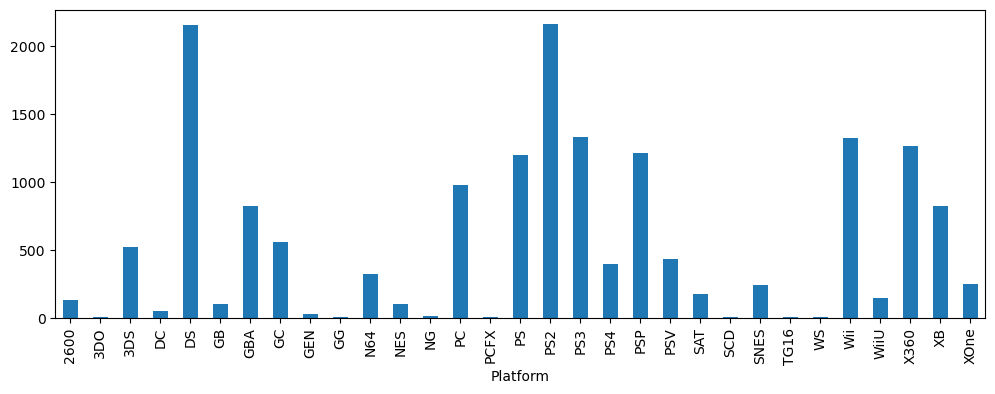

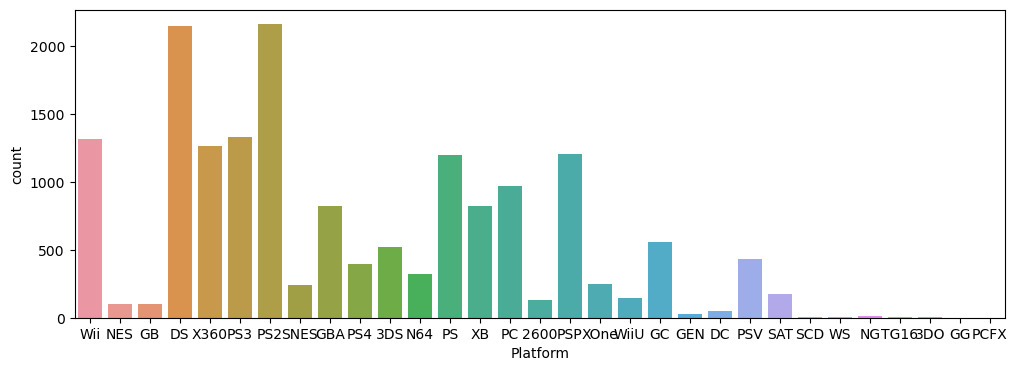

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns # 더 예쁘게 시각화 가능 

plt.figure(figsize=(12, 4))
df.groupby('Platform').size().plot.bar()

plt.figure(figsize=(12, 4))
sns.countplot(x='Platform', data=df) #same result using seaborn

(stacked bar charts)

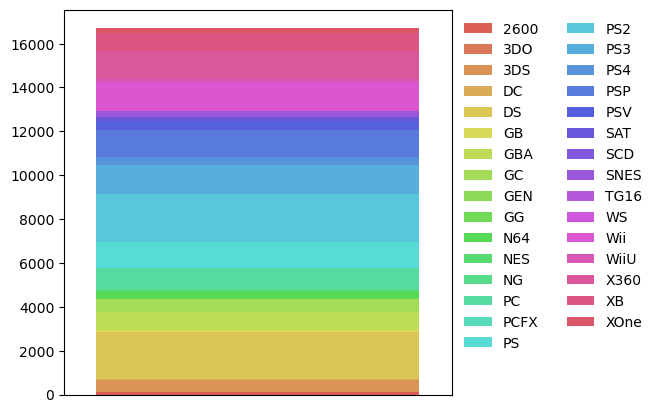

/var/folders/6h/grchm_d95kq59vq4y3tnsm7c0000gn/T/ipykernel_3668/1964493629.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stacked_df2 = stacked_df/stacked_df.sum(axis=1)[0]


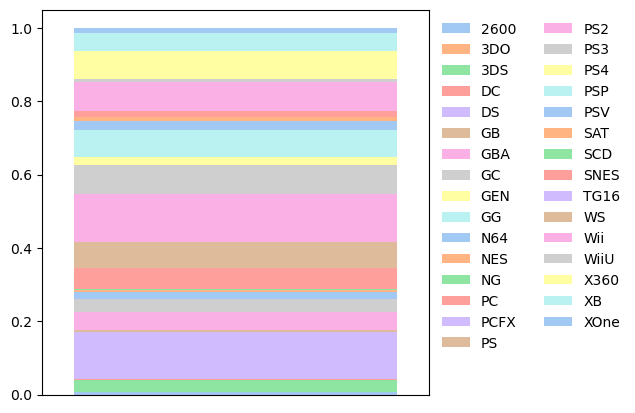

In [26]:
stacked_df = df.groupby('Platform').size().reset_index(name='n').set_index('Platform').transpose()
colors = sns.color_palette('hls',stacked_df.shape[1])
stacked_df.plot.bar(stacked=True, xticks=[], figsize=(5,5), color=colors)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, frameon=False)
plt.xlim([-0.3, 0.3])
plt.show()

stacked_df2 = stacked_df/stacked_df.sum(axis=1)[0]
colors = sns.color_palette('pastel',stacked_df2.shape[1])
stacked_df2.plot.bar(stacked=True, xticks=[], figsize=(5,5), color=colors)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, frameon=False)
plt.xlim([-0.3, 0.3])
plt.show()

x축은 정보를 표현하지 않음. 무의미.

### Polar coordinate 기반 bar chart

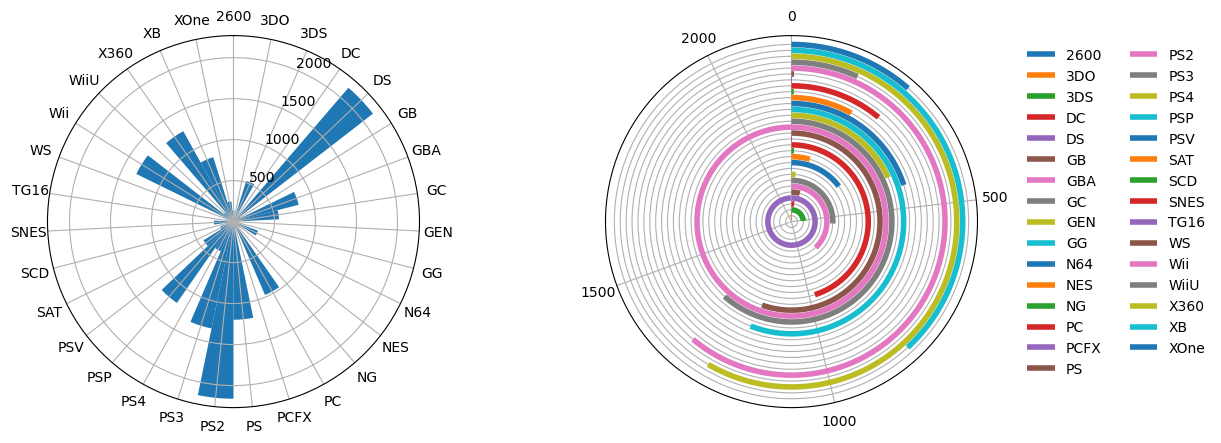

In [29]:
import numpy as np

fig = plt.figure(figsize = (12, 10))

polar_df = df.groupby('Platform').size().reset_index(name='n')
ax = fig.add_subplot(121, projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
theta = np.arange(0, 2*np.pi, 2*np.pi/len(polar_df))

ax.bar(theta, polar_df['n'], width=2*np.pi/len(polar_df))
ax.set_xticks(theta)
ax.set_xticklabels(polar_df['Platform'])

ax2 = fig.add_subplot(122, polar=True)
ax2.set_theta_direction(-1)
ax2.set_theta_zero_location('N')
ax2.set_yticklabels([])

prop_df = df.groupby('Platform').size().transform(lambda x : 2*np.pi*x/x.max()).reset_index(name='n')
proportions = prop_df['n']
y_pos = np.arange(len(proportions))
x = np.linspace(0, proportions, num=200)
y = np.vstack([y_pos] * 200)
ax2.set_yticks(y_pos)
ax2.set_xticks(np.arange(0, 2*np.pi, 2*np.pi*500/df['Platform'].value_counts().max()))
ax2.set_xticklabels(np.arange(0, df['Platform'].value_counts().max(), 500))
ax2.plot(x, y, lw=4, solid_capstyle="butt", label=prop_df['Platform'])
ax2.legend(loc='upper left', bbox_to_anchor=(1.1,1), ncol=2, frameon=False)
plt.subplots_adjust(wspace=0.5)
plt.show()

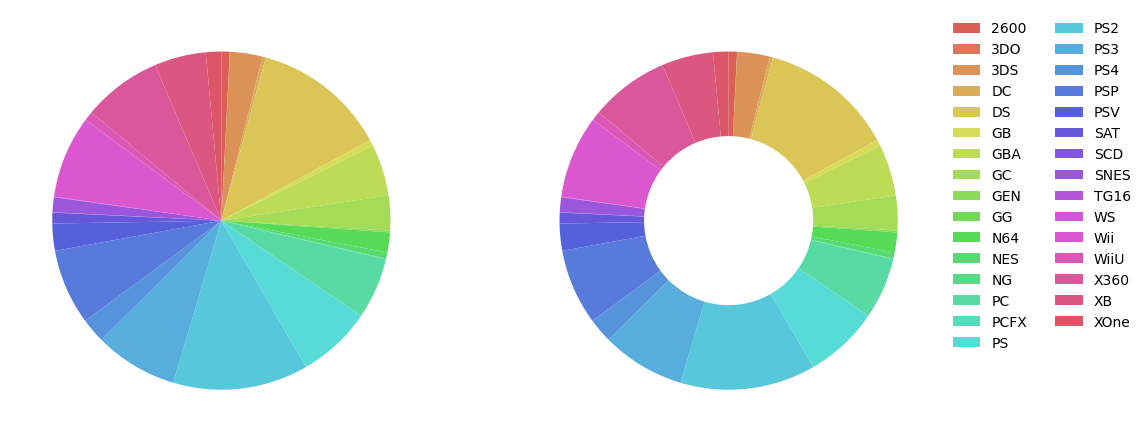

In [30]:
#stacked bar chart

colors = sns.color_palette('hls', stacked_df.shape[1])
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(121)
ax1.pie(
df.groupby('Platform').size(), counterclock = False, startangle =90, colors=colors
)
ax2 = fig.add_subplot(122)
ax2.pie(
df.groupby('Platform').size(), counterclock = False, startangle = 90, colors=colors, wedgeprops={'width' : 0.5}
)
ax2.legend(df.groupby('Platform').size().index, loc='upper left', bbox_to_anchor=(1, 1), ncol=2, frameon=False)
plt.show()

### histogram

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


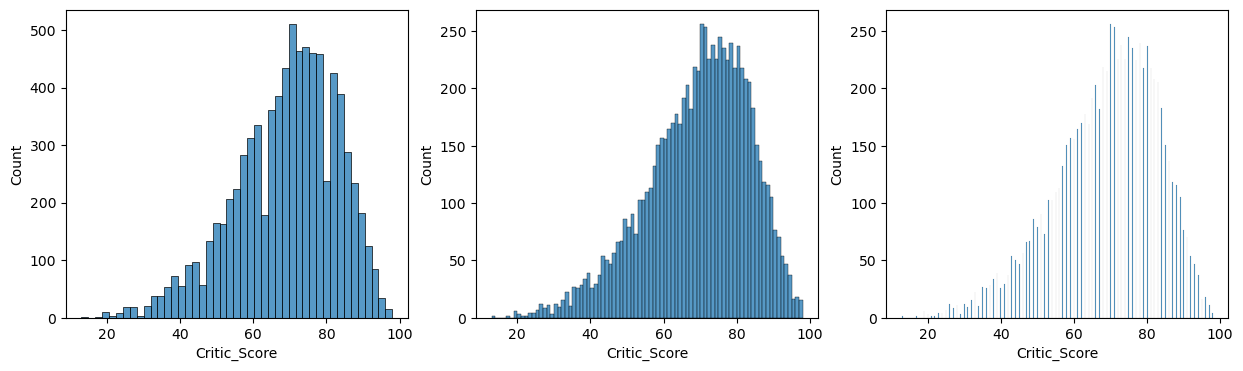

In [34]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(131)
ax = sns.histplot(data=df, x='Critic_Score')
ax2 = fig.add_subplot(132)
ax2 = sns.histplot(data=df, x='Critic_Score', binwidth=1)
ax3 = fig.add_subplot(133)
ax3 = sns.histplot(data=df, x='Critic_Score', bins=500)
plt.show()

### KDE Plot

### Boxplot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


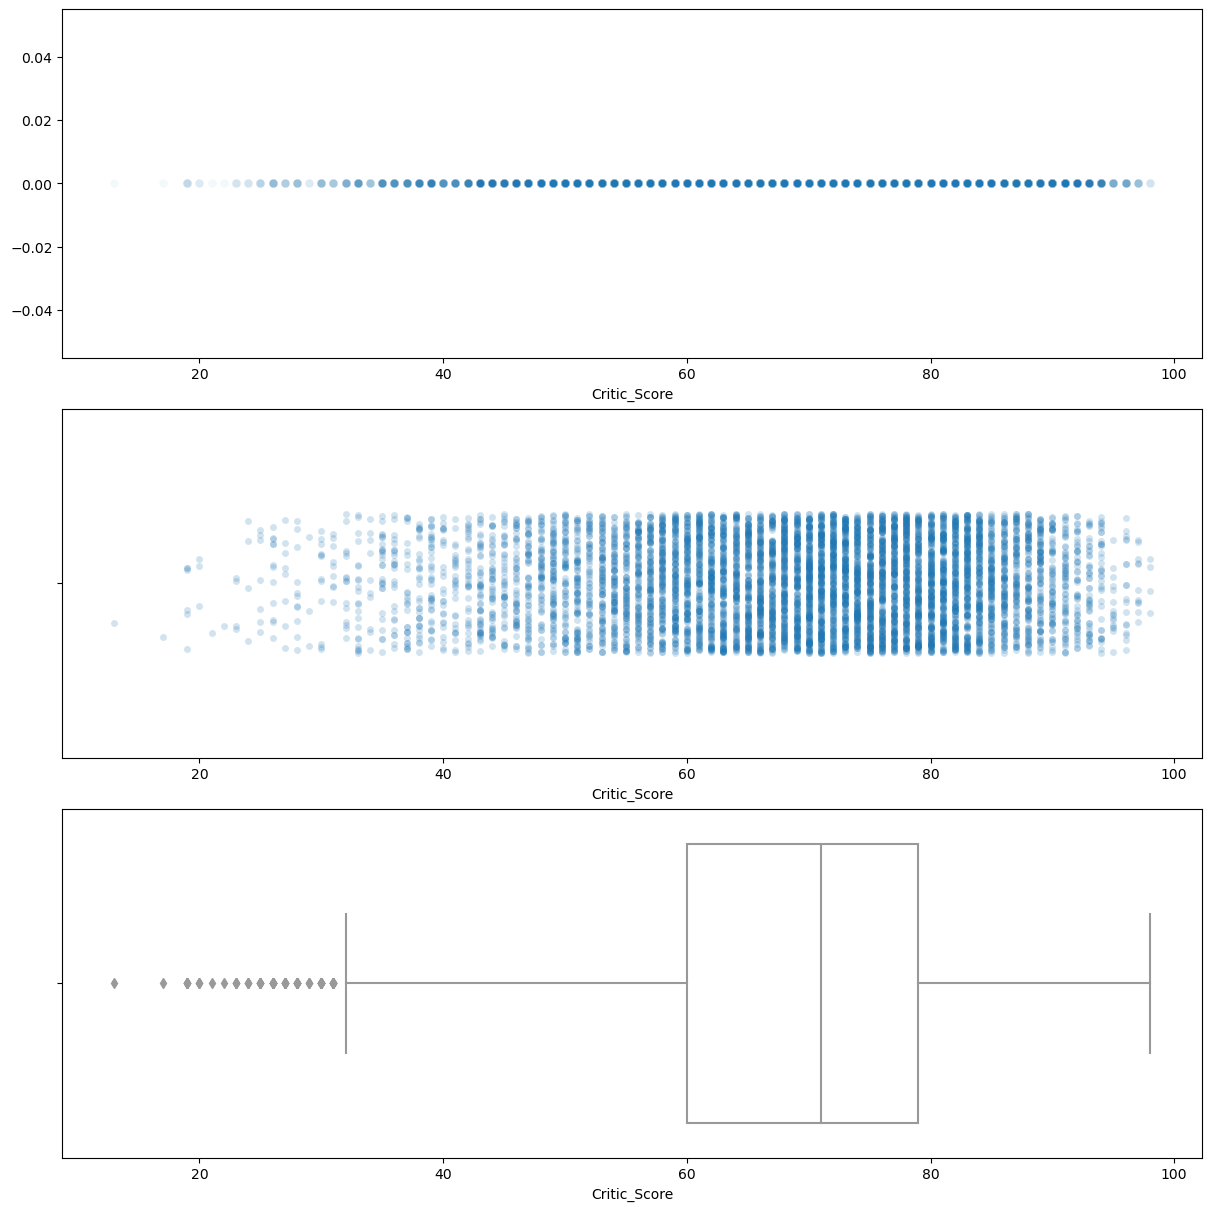

In [35]:
fig, axs = plt.subplots(nrows=3, figsize=(12, 12), constrained_layout=True)
sns.scatterplot(x='Critic_Score', y=[0]*len(df), data=df, alpha=.05, ax=axs[0])
sns.stripplot(x='Critic_Score', data=df, jitter=.2, alpha=.2, ax=axs[1])
sns.boxplot(x='Critic_Score', data=df, color='white', ax=axs[2])
plt.show()

### Violin plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


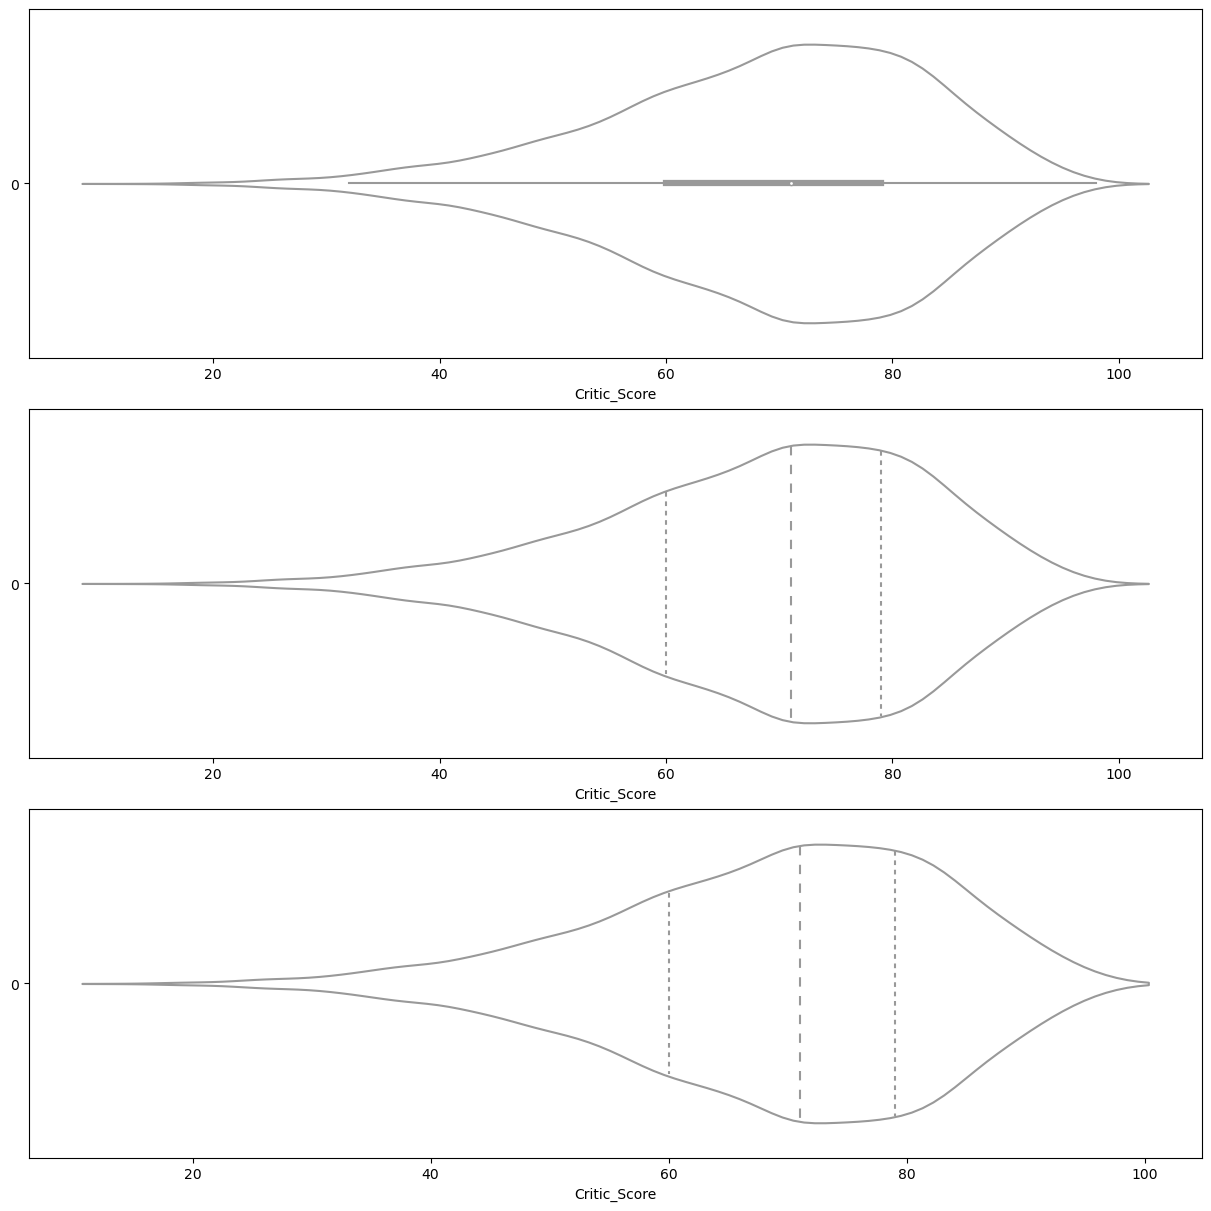

In [36]:
fig, axs = plt.subplots(nrows=3, figsize=(12, 12), constrained_layout=True)
sns.violinplot(x='Critic_Score', y=[0]*len(df), data=df, color='white', orient='h', ax=axs[0])
sns.violinplot(x='Critic_Score', y=[0]*len(df), data=df, color='white', orient='h', inner='quartile', ax=axs[1])
sns.violinplot(x='Critic_Score', y=[0]*len(df), data=df, color='white', orient='h', inner='quartile', cut=True, ax=axs[2])
plt.show()